# Introduction to Data Visualization with matplotlib

## Chapter I 

### Introduction to Matplotlib

Data visualizations let you derive insights from data and let you communicate about the data with others.

There are many software libraries that visualize data. We will use a Python library, **matplotlib** which is a widely used library. One of the main advantages of Matplotlib is that it gives you complete control over the properties of your plot. This allows you to customize and control the precise properties of your visualizations.

#### Introducing the pyplot interface

There are many different ways to use Matplotlib. In this course, we will use the main object-oriented interface. This interface is provided through the pyplot submodule.

```python
import matplotlib.pyplot as plt
fig, ax = plt.subplot()
plt.show()
```

Here, we import this submodule and name it **plt**. While using the name plt is not necessary for the program to work, this is a very strongly-followed convention. The **plt.subplot()** command, when called without any inputs, creates two different objects: a **Figure object** and an **Axes object**.

* **The Figure Object** : is a container that holds everything that you see on the page.

* **The Axes Object** : is the part of the page that holds the data. It is the canvas which we will draw with our data, to visualize it.

#### Adding data to axes

To add the data to the Axes, we call a plotting command **(ax.plot())**, plotting commands are methods of the Axes object.

```python
ax.plot(seattle_weather['MONTH'], seattle_weather['MYL-TAVG-NORMAL'])
plt.show()
```

For example, here we call the method called plot with the month column as the first argument and the temperature column as the second argument. Finally, we call the **plt.show()** function to show the effect of the plotting command.

If you want to add more data to the plot, we also add those data to the axes by calling the plot method again.

##### Steps

* First, we create the Figure and the Axes objects. ```fig, ax = plt.subplot()```

* Second, We call the Axes method plot to add data to our plot. ```ax.plot(data1, data2)```

* Third, we ask Matplotlib tho show us the figure. ```plt.show()```

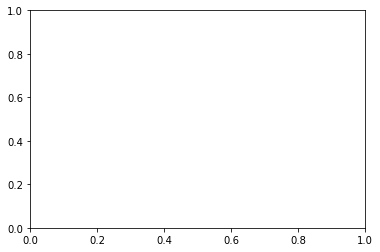

In [18]:
# Exercise I 
# Using the matplotlib.pyplot interface

# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
# Create a Figure and an Axes with plt.subplots()
fig, ax = plt.subplots()
# Call the show function to show the result
plt.show()  

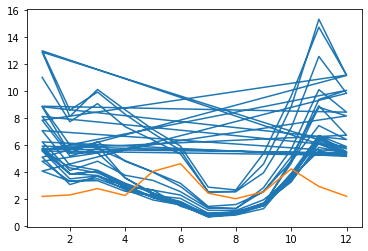

In [19]:
# Exercise II 
# Adding data to an Axes object
import pandas as pd
# DataFrames ==> seatle_weather and austin_weather
seattle_weather = pd.read_csv('datasets\\seattle_weather.csv')
austin_weather = pd.read_csv('datasets\\austin_weather.csv')

# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
# Create a Figure and an Axes with plt.subplots()
fig, ax = plt.subplots()
# Plot MlY-PRCP-NORMAL  from seattle_weather against the DATE
ax.plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'])
# Plot MlY-PRCP-NORMAL from austin_weather against DATE
ax.plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'])
# Call the show function
plt.show()


### Customizing your plots

#### Adding Markers

The plot method takes an optional keyword argument, **marker**, which lets you indicate that you are interested in adding markers to the plot and also what kind of markers you'd like.

```python
ax.plot([seattle_weather['MONTH'],
         seattle_weather['Temperature']],
          marker='o')
plt.show()
```
For example, passing the lower-case letter **"o"** indicates that you would like to use circles as markers.

If you were to pass a lower case letter **"v"** instead, you would get markers shaped like triangles pointing downwards.

To see all the possible marker styles, you can visit this page in the Matplotlib online [documentation](https://matplotlib.org/stable/api/markers_api.html).

#### Setting the linestyle

This is done by adding the **linestyle** keyword argument.

```python
fig, ax = plt.subplots()
ax.plot(seattle_weathers['DATE'],
         seattle_weathers['Temperature'],
          marker='v', linestyle='--')
plt.show()
```

Here two dashes are used to indicate that the line should be dashed. Like marker shapes, there are a few linestyles you can choose from, listed in this [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) page.

You can even go so far as to eliminate the lines altogether, by passing the string **"None"** as input to this keyword argument.

#### Choosing color

Finally, you can choose the color that you would like to use for the data.

```python
fig,ax = plt.subplots()
ax.plot(seattle_weather['DATE'], 
        seattle_weather['temperature'],
        marker='v', linestyle='--', color='r')
plt.show()        
```

For example, here we've chosen to show this data in red, indicated by the letter "r".

#### Customizing the axes labels

Another important thing to customize are the axis labels. If you want your visualizations to communicate properly you need to always label the axes. This is really important but is something that is often neglected. In addition to the plot method, the Axes object has several methods that start with the word set. These are methods that you can use to change certain properties of the object, before calling show to display it.

```python
ax.set_xlabel('Time (months)') # To change the x axis label

ax.set_ylabel('Average temperature (Fahrenheit degrees')) # To change the y axis

ax.set_title('Weather in Seattle') # To change the tittle
```

### Small multiples

In some cases, adding more data to a plot can make the plot too busy, obscuring patterns rather than revealing them.

One way to overcome this kind of mess is to use what are called **small multiples**. These are multiple small plots that show similar data across different conditions. For example, precipitation data across different cities.

#### Small multiples with plt.subplots()

In Matplotlib, small multiples are called sub-plots. That is also the reason that the function that creates these is called subplots. Previously, we called this function with no inputs. This creates one subplot. Now, we'll give it some inputs.

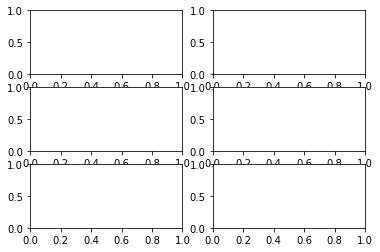

In [20]:
fig, ax = plt.subplots(3, 2) # First argument is the number of rows, second argument is the number of columns
plt.show()

Here, we are creating a Figure object with **three rows of subplots, and two columns**. This is what this would look like before we add any data to it. In this case, the variable ax is **no longer only one Axes object**.

#### Adding data to subplots

Instead, it is an array of Axes objects with a shape of 3 by 2. To add data, we would now have to index into this object and call the plot method on an element of the array.

In [21]:
# Adding data to the subplots
ax[0, 0].plot(seattle_weather['DATE'], 
              seattle_weather['MLY-PRCP-NORMAL'],
              color='b')

plt.show()

There is a special case for situations where you have only one row or only one column of plots. In this case, the resulting array will be one-dimensional and you will only have to provide one index to access the elements of this array. 

For example, consider what we might do with the rainfall data that we were plotting before. We create a figure and an array of Axes objects with two rows and one column. We address the first element in this array, which is the top sub-plot, and add the data for Seattle to this plot. 

Then, we address the second element in the array, which is the bottom plot, and add the data from Austin to it. We can add a y-axis label to each one of these. Because they are one on top of the other, we only add an x-axis label to the bottom plot, by addressing only the second element in the array of Axes objects. 

When we show this,

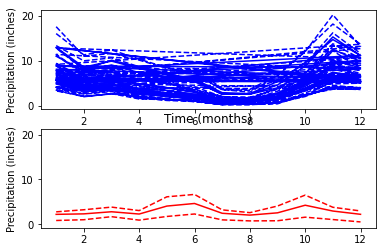

In [23]:
fig, ax = plt.subplots(2, 1, sharey=True) # To share the same 'y' value we use the 'sharey' keyword

ax[0].plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-NORMAL"], 
           color='b')
ax[0].plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-25PCTL"],
           linestyle='--', color='b')
ax[0].plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-75PCTL"],
           linestyle='--', color='b')
ax[1].plot(austin_weather['DATE'], austin_weather["MLY-PRCP-NORMAL"],
           color='r')
ax[1].plot(austin_weather['DATE'], austin_weather["MLY-PRCP-25PCTL"],
           linestyle='--', color='r')
ax[1].plot(austin_weather['DATE'], austin_weather["MLY-PRCP-75PCTL"],
           linestyle='--', color='r')
ax[0].set_ylabel("Precipitation (inches)")
ax[1].set_ylabel("Precipitation (inches)")
ax[1].set_title("Time (months)")
plt.show()  